In [ ]:
"""(Error reduction)Regularization Techniques for overfit
Rigde Regression:L2
         Lhridge(beta^)=summation(i=1 to N)(yi-xi'beta^)^2+lambda*summation(j=1 to m)(wj)(betaj^)^2-square values as coefficients,never reaches zero
   Lasso Regression:L1
         Llasso(beta^)=summation(i=1 to n)(yi-xibeta^)^2+lambda*summation(j=1 to m)|betaj^|-absolute value as coefficient,reaches zero,it is better than ridge"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x=np.array([1,2,3,4,5])
y=np.array([2.1,3.8,6.5,7.1,8.2])

In [4]:
x_b=np.c_[np.ones((x.shape[0],1)),x]#column_stack-c_
x_b

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

In [5]:
alpha_ridge=1.0
alpha_lasso=0.1#penalty value
num_iterations=1000
learning_rate=0.01

In [7]:
def lasso_regression(x,y,alpha,num_iterations,learning_rate):
  m,n=x.shape
  weights=np.zeros(n)
  for _ in range(num_iterations):
    y_pred=x.dot(weights)
    gradient=(x.T.dot(y_pred-y)+alpha*np.sign(weights))/m
    weights-=learning_rate*gradient
  return weights


In [9]:
def ridge_regression(x,y,alpha,num_iterations,learning_rate):
  m,n=x.shape
  weights=np.zeros(n)
  for _ in range(num_iterations):
    y_pred=x.dot(weights)
    gradient=(x.T.dot(y_pred-y)+alpha*weights)/m#gradient to reduce error
    weights-=learning_rate*gradient
  return weights


In [11]:
weights_ridge=ridge_regression(x_b,y,alpha_ridge,num_iterations,learning_rate)
weights_lasso=lasso_regression(x_b,y,alpha_lasso,num_iterations,learning_rate)

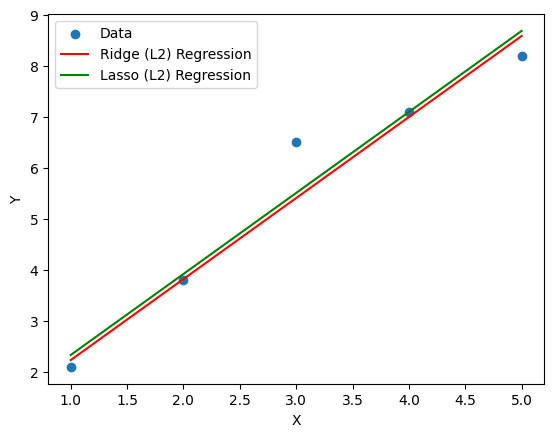

In [14]:
plt.scatter(x,y,label='Data')
plt.plot(x,x_b.dot(weights_ridge),label=f'Ridge (L2) Regression',color="red")
plt.plot(x,x_b.dot(weights_lasso),label=f'Lasso (L2) Regression',color="green")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()